# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at Discount Motors, a used car dealership in the UK. The dealership is expanding and has hired a large number of junior salespeople. Although promising, these junior employees have difficulties pricing used cars that arrive at the dealership. Sales have declined 18% in recent months, and management would like your help designing a tool to assist these junior employees.

To start with, they would like you to work with the Toyota specialist to test your idea(s). They have collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the head of sales in a 10 minute presentation. The head of sales has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

## **Table of contents:**

1. Imports and Setup
2. Data Investigation and Preprossing
3. Data Visualization and Analysis
4. Model Development
5. Feature Tranformation
6. Conclusion and Feature work


## Imports and Setup

In [111]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import shap

In [112]:
sns.set_palette("Set2")

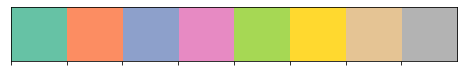

In [113]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.show()

In [114]:
df=pd.read_csv('toyota.csv')

## Data Investigation and Preprossing

In [115]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


### Data cleaning

- **convert all the 'None' values in the object datatype to check if there is hidden null values.**

In [116]:
df.replace(to_replace=['None'], value=np.nan, inplace=True)

- **check for nulls by info method.**

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


- **now check for duplicates and drop them if found.**

In [118]:
df.duplicated().sum()

39

In [119]:
df.drop_duplicates(inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


### Check range of the numeric values 

In [121]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,2016.742797,12529.799074,22889.588745,94.549933,63.078728,1.471996
std,2.205271,6358.562625,19109.288501,73.942649,15.861037,0.435624
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8266.500000,9488.500000,0.000000,55.400000,1.000000
50%,2017.000000,10798.000000,18571.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31059.500000,145.000000,70.600000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


- **There is a min value of 0 for the enginesize lets explore more.**

In [122]:
df['engineSize'].value_counts().sort_values()

4.2       1
4.5       1
0.0       6
3.0      34
2.8      36
1.4      40
2.2      58
2.4      70
1.6     166
2.5     247
1.2     300
2.0     394
1.3     600
1.8    1289
1.5    1419
1.0    2038
Name: engineSize, dtype: int64

- **I will remove it as it was not expected.**

In [123]:
filter = df['engineSize']==0

In [124]:
df = df[~filter]

In [125]:
df['engineSize'].value_counts().sort_values()

4.2       1
4.5       1
3.0      34
2.8      36
1.4      40
2.2      58
2.4      70
1.6     166
2.5     247
1.2     300
2.0     394
1.3     600
1.8    1289
1.5    1419
1.0    2038
Name: engineSize, dtype: int64

## Data Visualization and Analysis.

### Distributions of numeric features

<AxesSubplot:xlabel='engineSize', ylabel='Density'>

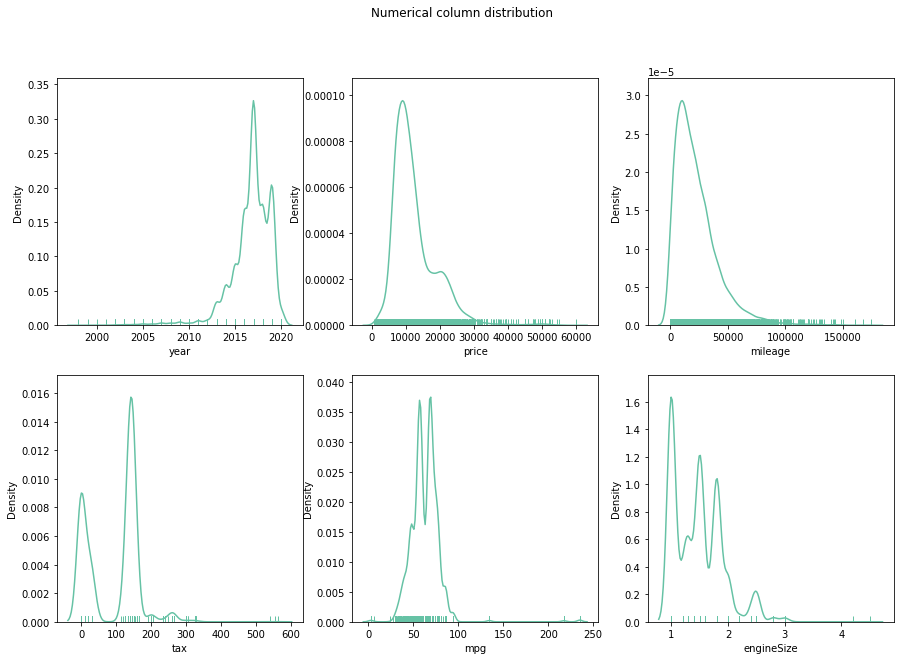

In [126]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
 
fig.suptitle('Numerical column distribution')
numerical_features=df[['year','price','mileage','tax','mpg','engineSize']]

sns.distplot(df['year'],ax=axes[0, 0] ,rug=True, hist=False)
sns.distplot(df['price'],ax=axes[0, 1] ,rug=True, hist=False)
sns.distplot( df['mileage'],ax=axes[0, 2] ,rug=True, hist=False)
sns.distplot( df['tax'],ax=axes[1, 0] ,rug=True, hist=False)
sns.distplot( df['mpg'],ax=axes[1, 1] ,rug=True, hist=False)
sns.distplot( df['engineSize'],ax=axes[1, 2] ,rug=True, hist=False)

- we cam see that most of the cars were produced between 2010 and 2020, with average mean price of  approximately 13000

### Distributions of categrical features

<AxesSubplot:xlabel='fuelType', ylabel='count'>

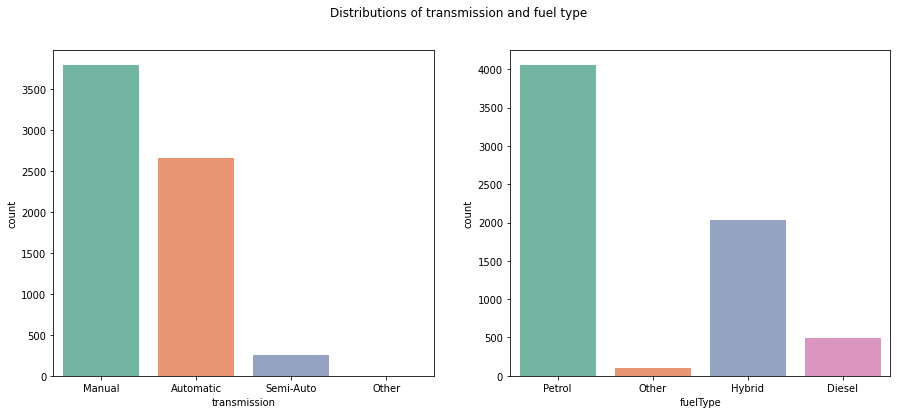

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distributions of transmission and fuel type')

sns.countplot(ax=axes[0], x='transmission',data=df,palette="Set2")
sns.countplot(ax=axes[1], x='fuelType',data=df)


- **lets explore transmission column more.**

In [128]:
df['transmission'].value_counts()

Manual       3788
Automatic    2650
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

- **I think the other value in the transmission is written by mistake and also compared to the count of the other unique values it can be removed.**

In [129]:
filter = df['transmission']== 'Other'

In [130]:
df = df[~filter]

In [131]:
df['transmission'].value_counts()

Manual       3788
Automatic    2650
Semi-Auto     254
Name: transmission, dtype: int64

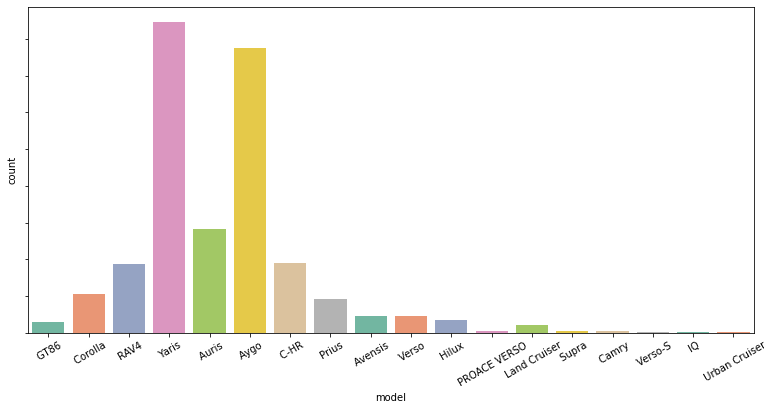

In [132]:
plt.figure(figsize=(13,6))
carModel_dist=sns.countplot(x='model',data=df,palette="Set2")
carModel_dist.set_xticklabels( carModel_dist.get_xticklabels(),rotation=30)
carModel_dist.set_yticklabels(carModel_dist.get_yticklabels(), rotation=30)
plt.show()

In [133]:
df['model'].value_counts()

 Yaris            2114
 Aygo             1937
 Auris             709
 C-HR              478
 RAV4              467
 Corolla           265
 Prius             232
 Verso             114
 Avensis           114
 Hilux              85
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

### Correlation matrix

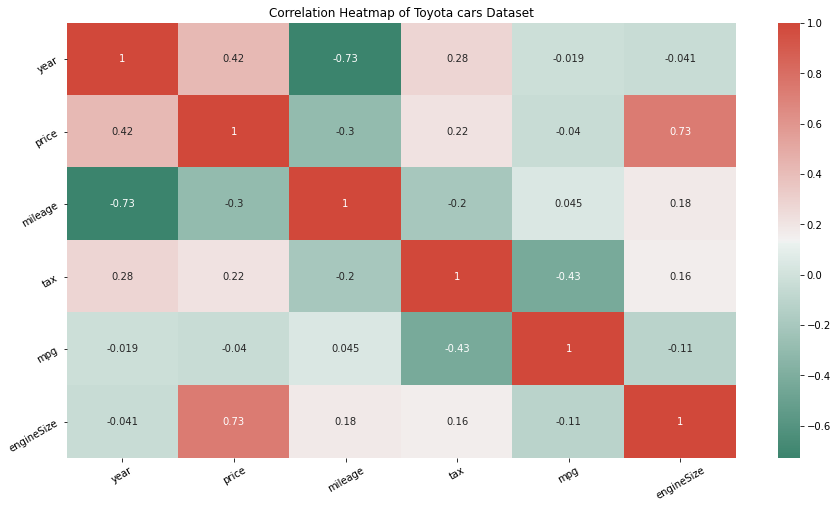

In [134]:
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap of Toyota cars Dataset')
cmap = sns.diverging_palette(160, 15, as_cmap=True)
htMap=sns.heatmap(df.corr(), annot=True,cmap=cmap)

htMap.set_xticklabels(htMap.get_xticklabels(), rotation=30)
htMap.set_yticklabels(htMap.get_yticklabels(), rotation=30)
plt.show()


- **It is shown here that price is highly correlated to the engine size.**
- **Price is also positive correlated with year and tax while  negatively correlated with mileage and mpg.**

### Price ranges variation with car model 

In [135]:
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [136]:
model_avgPrice=df[['model','price']].groupby(['model'],as_index=False).mean().sort_values('price')
model_avgPrice

,model,price
8,IQ,4247.250000
14,Urban Cruiser,4617.500000
16,Verso-S,5746.666667
2,Aygo,7886.135261
1,Avensis,9878.122807
17,Yaris,10546.736045
15,Verso,12169.157895
0,Auris,12524.730606
12,RAV4,18200.421842
11,Prius,18998.844828


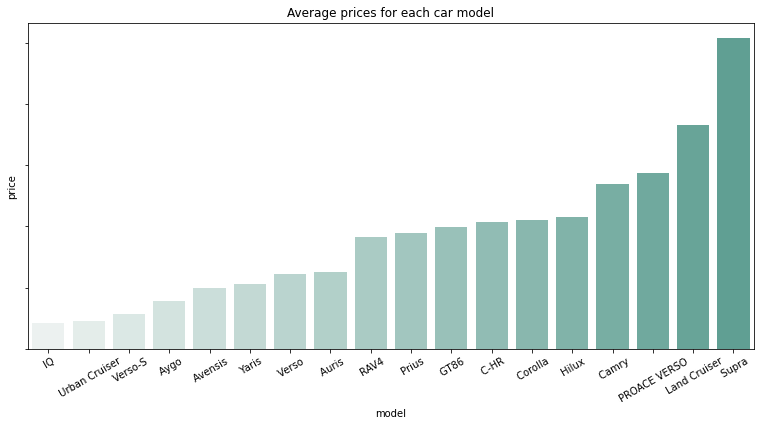

In [137]:
plt.figure(figsize=(13,6))
plt.title('Average prices for each car model')
model_count= sns.barplot(x='model',y='price',data=model_avgPrice,palette="light:#5A9")
model_count.set_xticklabels( model_count.get_xticklabels(),rotation=30)
model_count.set_yticklabels(model_count.get_yticklabels(), rotation=30)
plt.show()

- **it looks like model also affects the price**

### Price variation with year

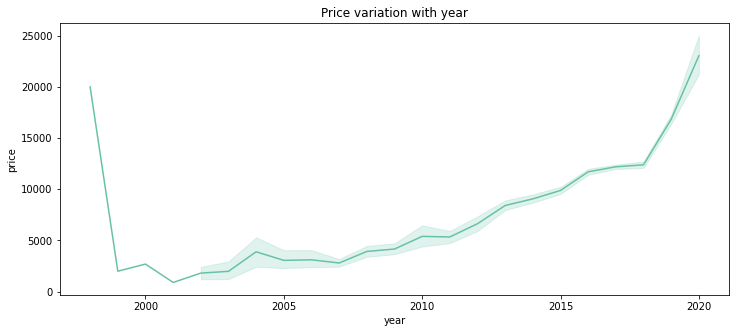

In [138]:
plt.figure(figsize=(12,5))
plt.title('Price variation with year')
sns.lineplot( x='year', y='price',data=df,palette="Set2")
plt.show()

- **the lineplot shown is not as expected.we will explore years column more.**

In [139]:
years_prices=df[['year','price']].groupby(['year'],as_index=False).count()

In [140]:
years_prices

,year,price
0,1998,1
1,1999,1
2,2000,1
3,2001,1
4,2002,4
5,2003,6
6,2004,7
7,2005,12
8,2006,11
9,2007,20


- **years column is unbalanced and I think considering one value for a whole year is missleading so lets remove the records from 1998 to 2001.**

In [141]:
filter = df['year']>=2002


In [142]:
df = df[filter]

<AxesSubplot:xlabel='year', ylabel='price'>

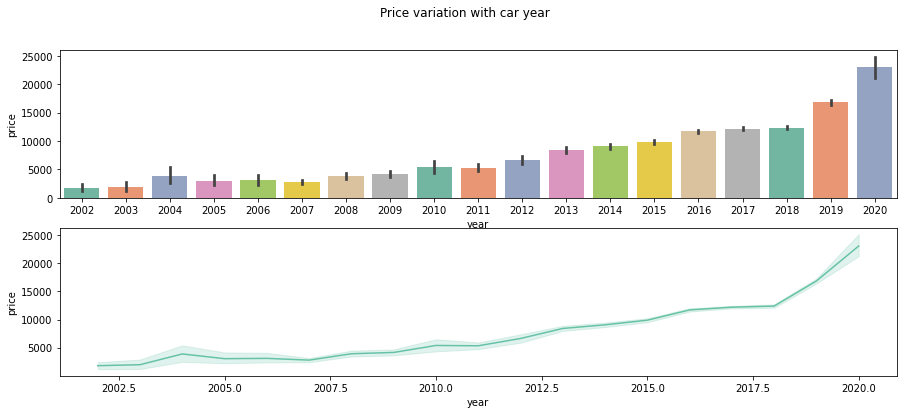

In [143]:
fig, axes = plt.subplots(2, 1, figsize=(15, 6))
fig.suptitle('Price variation with car year')

sns.barplot(ax=axes[0], x='year', y='price',data=df,palette="Set2")
sns.lineplot(ax=axes[1], x='year', y='price',data=df)


- **now year feature is more reliable.**

### Price variation with engine size

In [144]:
df['engineSize'].unique()

array([2. , 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1. , 1.3, 2.4, 3. , 2.8,
       4.5])

- **since there is not alot of unique values we can try boxplot.**

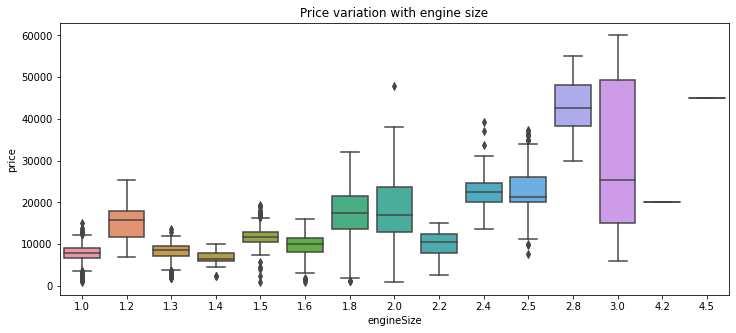

In [79]:
plt.figure(figsize=(12,5))
plt.title('Price variation with engine size')
sns.boxplot(x='engineSize', y='price',data=df)
plt.show()

### Price relation with mileage

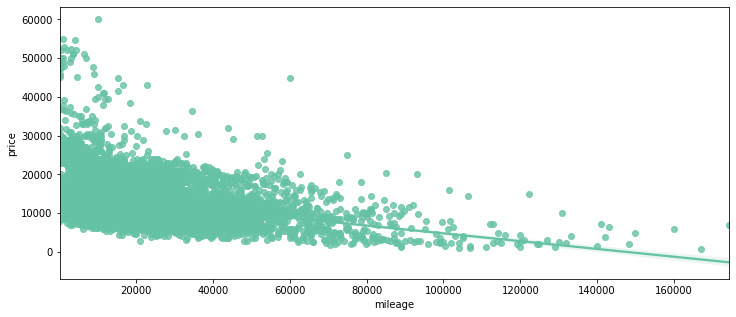

In [31]:
plt.figure(figsize=(12,5))
sns.regplot( x='mileage', y='price',data=df)
plt.show()

- **as we expected there is a negative correlation bettween the price and the mileage.**

### Price variation with transmission and fuel type

<AxesSubplot:xlabel='fuelType', ylabel='price'>

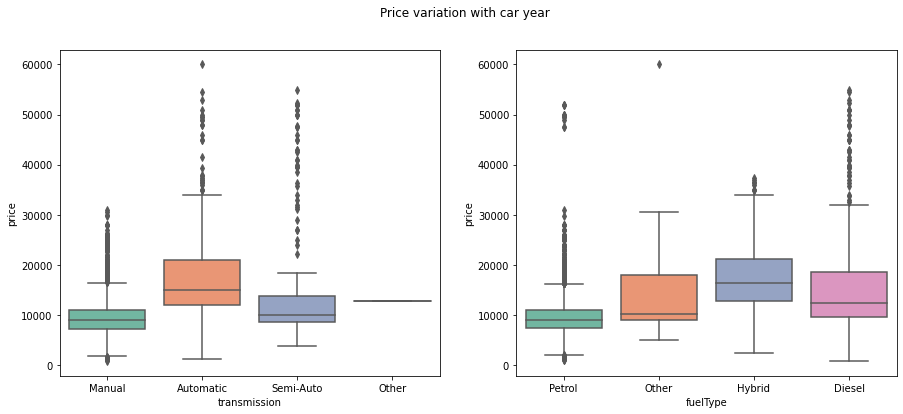

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Price variation with transmission and fuel type')

sns.boxplot(ax=axes[0], x='transmission', y='price',data=df,palette="Set2")
sns.boxplot(ax=axes[1], x='fuelType', y='price',data=df)


**From these graphs we can see that**
1. the price for the automatic transmission is higher than semi automatic and they are both higher than manual
2. the price for hybrid cars is higher , while there is alot of outliers in price range for diesel cars.

## Feature Tranformation

- **Transforming the categorical features (model,transmission,fuelType) into numeric.**

In [ ]:
df.head()

- **I will check the number of each column categories to choose the suitble encoding technique.**

In [41]:
print("number of unqiue values in model feature:",len(df['model'].unique()))
print("number of unqiue values in transmission feature:",len(df['transmission'].unique()))
print("number of unqiue values in fuelType feature:",len(df['fuelType'].unique()))

number of unqiue values in model feature: 18
number of unqiue values in transmission feature: 3
number of unqiue values in fuelType feature: 4


- **Since the number of unique values for the categorical feature is small enough therefore I will use onehot encoding.**  

In [42]:
encoder = OneHotEncoder(sparse=False)

In [43]:
cat_vars = encoder.fit_transform(df[['model','transmission','fuelType']])

In [44]:
to_drop=['model','transmission','fuelType','price']
X = df.drop(to_drop,axis=1)

In [45]:
X = np.concatenate((X, cat_vars),axis=1)
X.shape

(6688, 30)

In [46]:
feature_names = ['year','mileage','tax','mpg','engineSize'] + list(encoder.get_feature_names(['model','transmission','fuelType']))
X = pd.DataFrame(data=X, columns = feature_names)

In [47]:
X.head(5)

,year,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016.0,24089.0,265.0,36.2,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2017.0,18615.0,145.0,36.2,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2015.0,27469.0,265.0,36.2,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2017.0,14736.0,150.0,36.2,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2017.0,36284.0,145.0,36.2,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [48]:
y = df['price']
y.shape

(6688,)

## Model Development

- **I will use an XGBRegressor model. since we have many categorical values in our data therefore I think a tree model as XGBRegressor would fit the data well. I will also use gridsearch for hyperparameter tunning.**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1,random_state=0)

### Model building

In [75]:
xgb1 = XGBRegressor()

param = {'nthread':[4],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6],
              'min_child_weight': [2,4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        param,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
#xgb_grid.fit(X_train,
#         y_train)

#print(xgb_grid.best_score_)
#print(xgb_grid.best_params_)

- **now i will create the model using the best parameters.**

In [51]:
xgboost_regressor_model = XGBRegressor(random_state=0,
                             colsample_bytree=0.7,
                             min_child_weight=2,
                             n_estimators=500,
                             nthread=4,
                             max_depth=5,
                             subsample=0.7,
                             learning_rate=0.03)
xgboost_regressor_model.fit(X_train, y_train)
xgboost_regressor_model.score(X_train, y_train)

0.980080369334108

### Model evaluating 

- **I will choose Mean Squared Error to see how our predictions is close to the real target.**

In [52]:
pred = xgboost_regressor_model.predict(X_test)

In [53]:
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
display('root mean_squared_error ',rmse)

'root mean_squared_error '

999.3012040186352

- **The root mean square error is 999.3 almost 1000 which is less than 1500 so its is expected that most of the cars will not be sold.**

- **I will also use R2 score and explained variance  score to measure the amount of variance in the predictions explained by the dataset and the proportion of the variability of the predictions.**

In [54]:
r2 = r2_score(y_test, pred)
explained_variance = explained_variance_score(y_test, pred)
display('R2 Score  ',r2)
display('Explained Variance Score  ',explained_variance)

'R2 Score  '

0.9733753648823935

'Explained Variance Score  '

0.9733753756760253

### Feature Importance

- **I will use indirect sort to get inices of sorted array to use it  in the barplot**

In [55]:
sort_ind = xgboost_regressor_model.feature_importances_.argsort()

In [56]:
feature_names =np.array(X.columns)

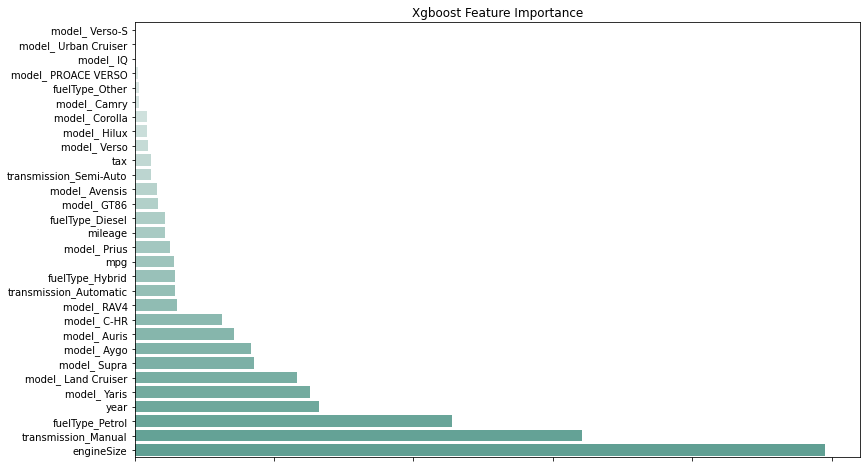

In [57]:
plt.figure(figsize=(13,8))
plt.title('Xgboost Feature Importance')
fig=sns.barplot(xgboost_regressor_model.feature_importances_[sort_ind],feature_names[sort_ind],palette="light:#5A9")
fig.set_xticklabels( fig.get_xticklabels(),rotation=30)
plt.show()

- **It is shown from the above graph that the engine size and whether it is manual transmission car or not are the most features that affect our prediction.**

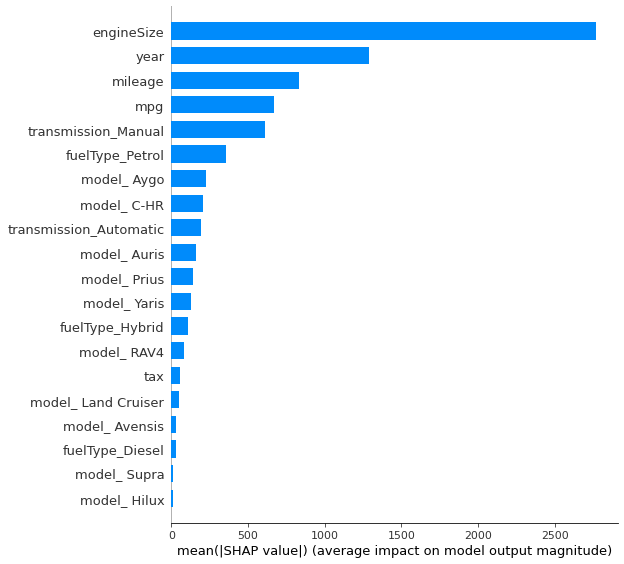

In [60]:
explainer = shap.TreeExplainer(xgboost_regressor_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar") 


- we can also use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals.Each point on the summary plot is a Shapley value for a feature and an instance. The color represents the value of the feature from low to high and  The features are ordered according to their importance.

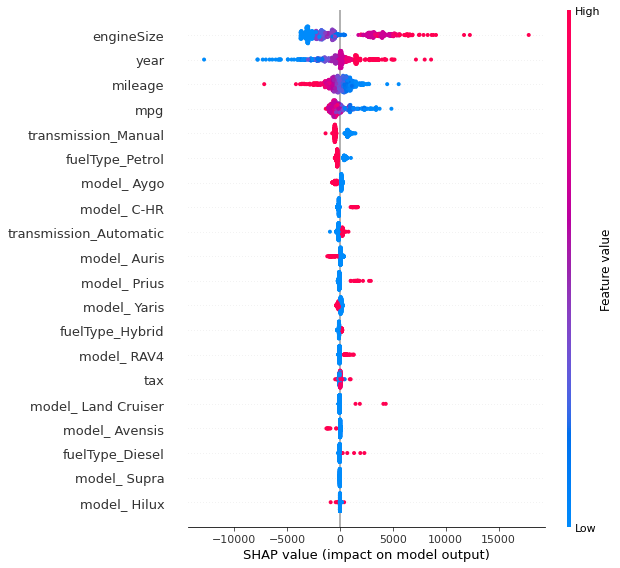

In [62]:
shap.summary_plot(shap_values, X_test)

- shap dependence plots show the effect of a single feature across the whole dataset. They plot a feature's value verses the shape value of that feature across many samples.I will plot the feature with heighst importance weight.

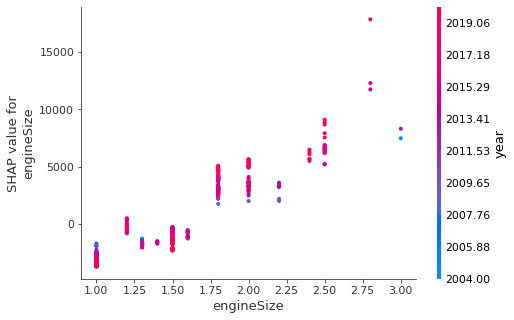

In [63]:
shap.dependence_plot("engineSize", shap_values, X_test)

## Conclusions and Feature work

- Our main objective was to generate a model to help predict the price of the used Toyota cars to help the sales team to fairly price their cars.
- After analyzing the data we found that :
    1. the price is influenced by the engine size the most and also affected by the year, tax of the car.
    2. the price is negitively affected by mileage and mpg. 
    3. hybrid models and automatic transmission types are the most expensive
    4. the model affect the price , Supra and Land crusier have highest average prices.
- The model was developed using grid search for tunning the hyperparameters and XGBooster reggresor as a model. The model achieved a R2 score of 0.97 and RMSE of approximatly 1000. Furthermore, the feature importance analysis indicates that the most important features are engine size , year, transimission and mileage.
- The model can be improved by adding more balanced trainning data and with more hyperparameter tuning we could achieve better results. we can also use  only the most important features while alternating or combinig the lesser ones like tax and fuel type.
-We can deploy the model through an API and host the application in the cloud.